<a href="https://colab.research.google.com/github/Harold-Rodriguez/LandsCape_Image_Classification/blob/main/LandsCape_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <centering> Projet BigData - Deep Learning </centering>

MAPI3 2022

*   Harold RODRÍGUEZ

## Packages

In [ ]:
!pip install tensorflow
%load_ext tensorboard 

In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **DATASET**

Nous importerons les données à traiter depuis un dossier de Google Drive où nous les avons enregistrées.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nous définissons les paramètres pour le jeu de données.

In [4]:
# Taille de l'image
img_height=170
img_width=256
# Taille du batch
batch_size=30
# Adresse de du repertoire 
directory = "/content/drive/MyDrive/11_MAS2/Projet_BigData/LandsCape_DataSet"

In [5]:
# Nous obtenons le données d'entrainement
train_features_raw = tf.keras.preprocessing.image_dataset_from_directory(
    directory, 
    labels='inferred', 
    label_mode='int',
    class_names=None, 
    color_mode='rgb', 
    batch_size=32, 
    image_size=(img_height, img_width),
     shuffle=True, 
     seed=42, 
     validation_split=0.2, 
     subset='training',) 

Found 3781 files belonging to 7 classes.
Using 3025 files for training.


In [6]:
# Nous obtenons les données de test
test_features_raw = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode= 'int',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',)

Found 3781 files belonging to 7 classes.
Using 756 files for validation.


Nous utilisons Autotune pour optimiser le traitement des données (la mémoire RAM prend que les données nécessaires).

In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_features = train_features_raw.cache().prefetch(buffer_size=AUTOTUNE)
test_features = test_features_raw.cache().prefetch(buffer_size=AUTOTUNE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


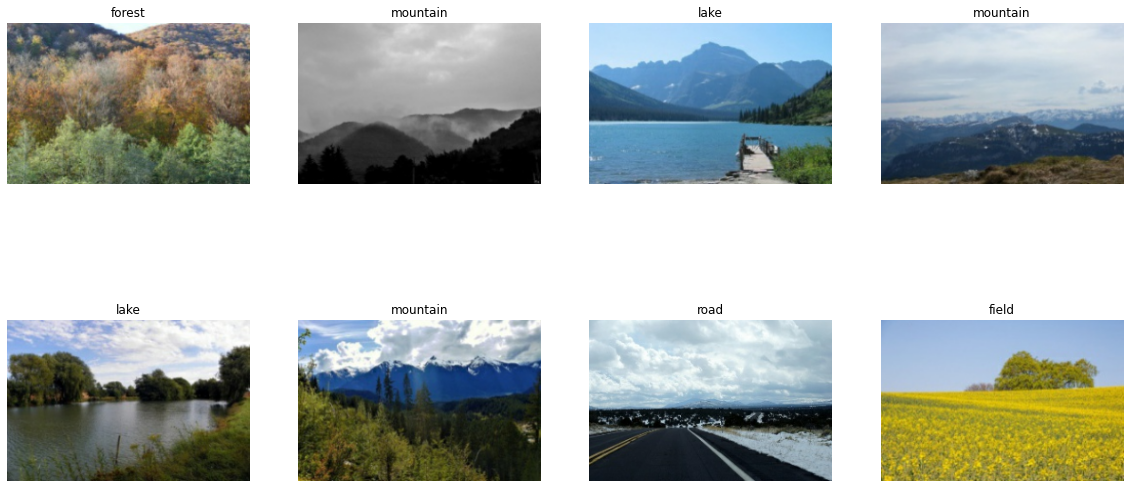

In [8]:
# Nous affichons quelques images du jeu de données (une pour chaque catégorie)

plt.figure(figsize=(20, 10))
for images, labels in train_features_raw.take(2):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_features_raw.class_names[labels[i]])
        plt.axis("off")

## Modelès

2. Nous allons entraîner notre propre réseau de convolutions:

Ce réseau est composé par une couche de convolutions comportant 32 filtres de taille (3x3), une couche de MaxPooling de taille (2x2) et une dernière couche dense de taille 7.

In [22]:
denseModel = tf.keras.models.Sequential([layers.experimental.preprocessing.Rescaling(1./255), # Nous processons les images d'abord
                                         tf.keras.layers.Flatten(input_shape=(170, 256, 3)), 
                                         tf.keras.layers.Dense(150, activation='relu'), 
                                         tf.keras.layers.Dense(150, activation='relu'),
                                         tf.keras.layers.Dense(7, activation='softmax')])

cnnModel = tf.keras.models.Sequential([layers.experimental.preprocessing.Rescaling(1./255),
                                       tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),  
                                       tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),

                                       tf.keras.layers.Flatten(), 
                                       tf.keras.layers.Dense(100, activation='relu'), 
                                       tf.keras.layers.Dense(7, activation='softmax')
                                       ])

cnnModel2 = tf.keras.models.Sequential([layers.experimental.preprocessing.Rescaling(1./255),
                                       tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),  
                                       tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       
                                       tf.keras.layers.Dropout(0.5), 
                                       tf.keras.layers.Flatten(), 
                                       tf.keras.layers.Dense(250, activation='relu'), 
                                       tf.keras.layers.Dense(7, activation='softmax')
                                       ])

In [24]:
denseModel.compile(optimizer='adam',
                   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

cnnModel.compile(optimizer='adam',
                   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

cnnModel2.compile(optimizer='adam',
                   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
#from gc import callbacks
tensorboardenseModel = TensorBoard(log_dir='logs/denseModel')
denseModel.fit(train_features, batch_size=32, 
               epochs=100,
               validation_data=test_features, 
               callbacks=[tensorboardenseModel])

In [ ]:
tensorboarcnnModel = TensorBoard(log_dir='logs/cnnModel')
cnnModel.fit(train_features, batch_size=32, 
             epochs=100,
             validation_data=test_features, 
             callbacks=[tensorboarcnnModel])

In [ ]:
tensorboarcnnModel2 = TensorBoard(log_dir='logs/cnnModel2')
cnnModel2.fit(train_features, batch_size=32,
              epochs=100,
              validation_data=test_features,
              callbacks=[tensorboarcnnModel2])

Une autre technique utilisée pour augmenter les performances d'un modèle en régime de sur-apprentissage est la Data Augmentation: On génère des données supplémentaires, en appliquant des transformations (rotations, zooms,...) aux données d'entraînement pour ensuite entraîner notre réseau avec les nouvelles données générées.

À partir de la fonction "augmenting_datage", nous générons des nouvelles données d'entraînement, et de test.

In [32]:
# La fonction augmenting_datagen génère des nouvelles données en appliquant des transformations à un jeu de données
augmenting_datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=40, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # randomly shift images horizontally (fraction of total height)
    height_shift_range=0.2,# randomly shift images vertically (fraction of total height)
    shear_range=15,# set range for random shear
    zoom_range=[0.7, 1.4],# set range for random zoom
    horizontal_flip=True,# randomly flip images
    vertical_flip=True,
    fill_mode='nearest' # set mode for filling points outside the input boundaries
)

In [33]:
train_generator = augmenting_datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=32,
        subset='training',
        class_mode='categorical')

validation_generator = augmenting_datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=32,
        subset='validation',
        class_mode='categorical')

Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


In [ ]:
denseModel_AD = tf.keras.models.Sequential([layers.experimental.preprocessing.Rescaling(1./255), # Nous processons les images d'abord
                                         tf.keras.layers.Flatten(input_shape=(170, 256, 3)), 
                                         tf.keras.layers.Dense(150, activation='relu'), 
                                         tf.keras.layers.Dense(150, activation='relu'),
                                         tf.keras.layers.Dense(7, activation='softmax')])

cnnModel_AD = tf.keras.models.Sequential([layers.experimental.preprocessing.Rescaling(1./255),
                                       tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),  
                                       tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),

                                       tf.keras.layers.Flatten(), 
                                       tf.keras.layers.Dense(100, activation='relu'), 
                                       tf.keras.layers.Dense(7, activation='softmax')
                                       ])

cnnModel2_AD = tf.keras.models.Sequential([layers.experimental.preprocessing.Rescaling(1./255),
                                       tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),  
                                       tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(170, 256, 3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       
                                       tf.keras.layers.Dropout(0.5), 
                                       tf.keras.layers.Flatten(), 
                                       tf.keras.layers.Dense(250, activation='relu'), 
                                       tf.keras.layers.Dense(7, activation='softmax')
                                       ])

In [ ]:
denseModel_AD.compile(optimizer='adam',
                   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

cnnModel_AD.compile(optimizer='adam',
                   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

cnnModel2_AD.compile(optimizer='adam',
                   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
#from gc import callbacks
tensorboardenseModel_AD = TensorBoard(log_dir='logs/denseModel_AD')
denseModel.fit(train_features, batch_size=32, 
               epochs=100,
               validation_data=test_features, 
               callbacks=[tensorboardenseModel_AD])

In [ ]:
tensorboarcnnModel_AD = TensorBoard(log_dir='logs/cnnModel_AD')
cnnModel.fit(train_features, batch_size=32, 
             epochs=100,
             validation_data=test_features, 
             callbacks=[tensorboarcnnModel_AD])

In [ ]:
tensorboarcnnModel2_AD = TensorBoard(log_dir='logs/cnnModel2_AD')
cnnModel2.fit(train_features, batch_size=32,
              epochs=100,
              validation_data=test_features,
              callbacks=[tensorboarcnnModel2_AD])

In [ ]:
%tensorboard --logdir  logs 